In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from os import write
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from ResnetModels import ResNet, ResNet50

In [10]:
def load_history(history_dir):
    data = {}
    with open(history_dir) as infile:
        data = json.load(infile)
    return data
def smooth_data(x, kernel=5):
    ret_val = []
    pad = (kernel - 1) / 2
    pad = int(pad)
    base, append = [0]*pad, [0]*pad
    base.extend(x)
    base.extend(append)
    for i in range(pad, len(base)-pad):
        low, high = i - pad, i + pad + 1
        count = 0
        subsequence = base[low:high]
        for s in subsequence:
            if s > 0:
                count += 1
        s = np.sum(subsequence)
        ret_val.append(s/count)
    return ret_val

In [3]:
data = load_history('results/resnet50_vanilla.json')

In [4]:
print(data.keys())

dict_keys(['loss', 'acc'])


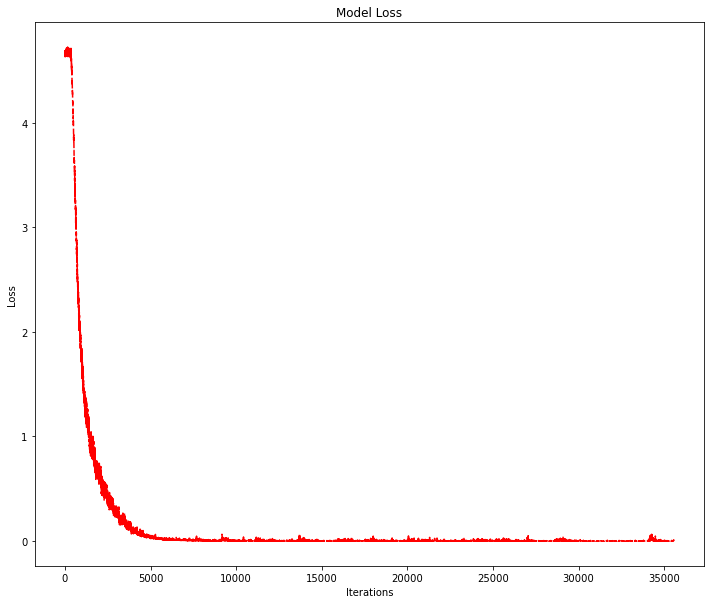

In [14]:
plot_data = smooth_data(data['loss']['train_iter'], kernel=3)
num_points = len(plot_data)
plt.figure(figsize=(12, 10))
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(range(num_points), plot_data, 'r--')
plt.show()

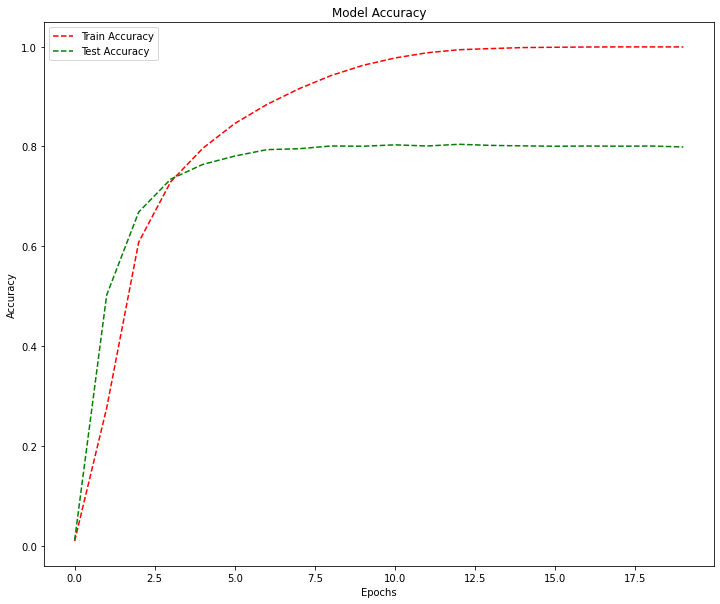

In [16]:
train_acc = data['acc']['train'][0:20]
test_acc = data['acc']['test'][0:20]
num_points = len(train_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(num_points), train_acc, 'r--', label='Train Accuracy')
plt.plot(range(num_points), test_acc, 'g--', label='Test Accuracy')
plt.legend()
plt.show()

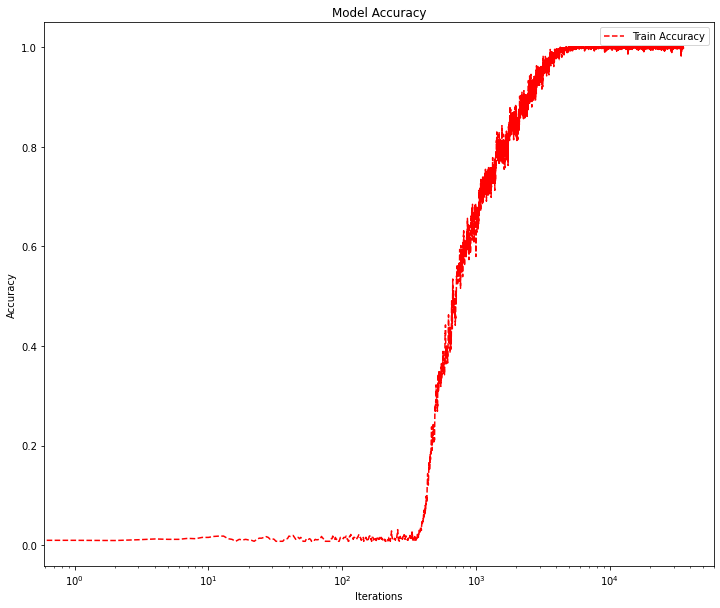

In [23]:
train_acc = smooth_data(data['acc']['train_iter'])
num_train = len(train_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(range(num_train), train_acc, 'r--', label='Train Accuracy')
plt.xscale('log')
plt.legend()
plt.show()